#Importar librerias

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

#Descargo el dataset y segmento UCI_TIME

In [ ]:
#!gdown 1C4IyUGc8YtKmmY1e7QP4T-6c10E8Nms-

#!dgown 18xg5SYv6nTa60xjqCYwgRZZh9Cdn1qmQ



df_filt1=pd.read_csv('df_filt1.csv')
df_filt1

,subject_id,weight,height,age,Anestesia_TIME,Operation_TIME,UCI_TIME,Survival Rate,rr_mean,spo2_mean,...,hr_max,art_dbp_max,art_mbp_max,etco2_max,fio2_max,hs_max,uo_max,ebl_max,peep_max,sex_encoded
0,192250700,59.0,163.0,65,380.0,340.0,2345.0,0,9.519231,99.215190,...,108.0,68.0,88.0,35.0,95.0,700.0,500.0,500.0,5.0,0
1,144893612,63.0,174.0,40,175.0,140.0,1930.0,0,15.027778,95.000000,...,108.0,0.0,0.0,41.0,91.0,400.0,50.0,40.0,0.0,1
2,118515241,46.0,146.0,85,180.0,100.0,3770.0,0,10.569444,99.729730,...,108.0,82.0,114.0,37.0,0.0,400.0,120.0,40.0,1.0,0
3,131682281,56.0,156.0,30,195.0,165.0,0.0,0,9.085714,100.000000,...,74.0,82.0,106.0,35.0,58.0,550.0,90.0,150.0,3.0,0
4,192170760,64.0,162.0,35,125.0,100.0,0.0,0,9.596154,99.444444,...,88.0,0.0,0.0,35.0,95.0,550.0,20.0,150.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,186132074,49.0,146.0,80,185.0,115.0,0.0,0,10.565789,99.447368,...,76.0,68.0,106.0,39.0,97.2,0.0,20.0,300.0,7.0,0
1162,192891843,64.0,158.0,50,115.0,85.0,0.0,0,9.847826,99.375000,...,108.0,88.0,114.0,35.0,76.0,400.0,50.0,100.0,5.0,0
1163,173675824,75.0,160.0,25,115.0,70.0,0.0,0,10.782609,99.280000,...,100.0,64.0,86.0,35.0,97.2,0.0,0.0,40.0,3.0,0
1164,178121234,60.0,158.0,70,255.0,215.0,0.0,0,10.673077,99.849057,...,64.0,72.0,98.0,39.0,97.2,200.0,70.0,100.0,4.0,1


In [ ]:
# Crear una copia de la columna
df1 = df_filt1[df_filt1['UCI_TIME']!=0].copy()

df1['UCI_TIME'] = df1['UCI_TIME'].apply(lambda x: 0 if x <= 2880 else (1 if x <= 7200 and x>2880 else 2))


# Mostrar el DataFrame resultante
conteo1=df1['UCI_TIME'].value_counts()
conteo1


,count
UCI_TIME,
0,174
1,79
2,64


In [ ]:
df1

,subject_id,weight,height,age,Anestesia_TIME,Operation_TIME,UCI_TIME,Survival Rate,rr_mean,spo2_mean,...,hr_max,art_dbp_max,art_mbp_max,etco2_max,fio2_max,hs_max,uo_max,ebl_max,peep_max,sex_encoded
0,192250700,59.0,163.0,65,380.0,340.0,0,0,9.519231,99.215190,...,108.0,68.0,88.0,35.0,95.0,700.0,500.0,500.0,5.0,0
1,144893612,63.0,174.0,40,175.0,140.0,0,0,15.027778,95.000000,...,108.0,0.0,0.0,41.0,91.0,400.0,50.0,40.0,0.0,1
2,118515241,46.0,146.0,85,180.0,100.0,1,0,10.569444,99.729730,...,108.0,82.0,114.0,37.0,0.0,400.0,120.0,40.0,1.0,0
5,108271631,51.0,167.0,60,400.0,325.0,2,0,12.580247,99.439024,...,108.0,88.0,114.0,39.0,0.0,700.0,150.0,400.0,0.0,1
20,114467371,43.0,156.0,70,335.0,300.0,1,0,11.126866,98.328358,...,100.0,58.0,86.0,35.0,95.0,0.0,0.0,500.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,116050604,43.0,157.0,50,415.0,380.0,0,0,9.717949,99.383721,...,100.0,82.0,114.0,37.0,95.0,400.0,400.0,150.0,8.0,0
1149,141587970,57.0,167.0,85,230.0,175.0,0,0,12.021739,99.844444,...,108.0,88.0,114.0,37.0,97.2,0.0,40.0,100.0,5.0,1
1150,163788193,56.0,158.0,50,100.0,75.0,0,0,11.568182,99.954545,...,108.0,82.0,114.0,35.0,95.0,0.0,120.0,40.0,1.0,0
1151,123085700,51.0,159.0,65,105.0,75.0,1,0,15.975000,99.900000,...,108.0,82.0,114.0,41.0,95.0,0.0,50.0,500.0,5.0,1


#Modelos ML . Pre- desbalanceo


In [ ]:
# Preparación de los datos
X = df1.drop(columns=['UCI_TIME', 'Survival Rate', 'subject_id','weight','height','age','Anestesia_TIME','Operation_TIME'])
#X = df_filt1.drop(columns=['UCI_TIME', 'Survival Rate', 'subject_id'])
y = df1['UCI_TIME']

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, roc_auc_score, roc_curve, auc as sklearn_auc



# Inicializar modelos
models = {
    'KNeighbors': KNeighborsClassifier(),
    'SVC': SVC(probability=True),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Entrenar los modelos
for name, model in models.items():
    model.fit(X_train, y_train)

# Función para calcular NPV
def npv_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    TN = cm[0, 0]
    FN = cm[1, 0]
    return TN / (TN + FN) if (TN + FN) > 0 else np.nan

# Función para calcular Specificity
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    return TN / (TN + FP) if (TN + FP) > 0 else np.nan

# Inicializar la lista de resultados
results = []
confusion_matrices = {}
roc_curves = {}

# Calcular métricas para cada modelo y clase
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None
    # Guardar la matriz de confusión para su visualización posterior
    confusion_matrices[name] = confusion_matrix(y_test, y_pred)

    classes = np.unique(y_train)
    for i in classes:
        y_true_binary = (y_test == i).astype(int)
        y_pred_binary = (y_pred == i).astype(int)

        accuracy = accuracy_score(y_true_binary, y_pred_binary) * 100
        sensitivity = recall_score(y_true_binary, y_pred_binary) * 100
        specificity = specificity_score(y_true_binary, y_pred_binary) * 100
        f1 = f1_score(y_true_binary, y_pred_binary) * 100
        auc = roc_auc_score(y_true_binary, y_prob[:, i]) * 100 if y_prob is not None else np.nan

        results.append([f'{name} Class {i}', accuracy, sensitivity, specificity, f1, auc])

        # Calcular la curva ROC
        if y_prob is not None:
            fpr, tpr, _ = roc_curve(y_true_binary, y_prob[:, i])
            roc_auc = sklearn_auc(fpr, tpr)
            roc_curves[f'{name} Class {i}'] = (fpr, tpr, roc_auc)

    # Calcular promedios
    metrics = np.array([result[1:] for result in results if result[0].startswith(name)])
    average_metrics = np.mean(metrics, axis=0)
    results.append([f'{name} Average', *average_metrics])

# Crear el DataFrame
df = pd.DataFrame(results, columns=['Model', 'Accuracy (%)', 'Sensitivity or recall (%)', 'Specificity (%)', 'F1-Score (%)', 'AUC (%)'])

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:07:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
df

,Model,Accuracy (%),Sensitivity or recall (%),Specificity (%),F1-Score (%),AUC (%)
0,KNeighbors Class 0,60.937500,93.939394,25.806452,71.264368,69.843597
1,KNeighbors Class 1,67.187500,5.000000,95.454545,8.695652,65.340909
2,KNeighbors Class 2,81.250000,27.272727,92.452830,33.333333,74.185249
3,KNeighbors Average,69.791667,42.070707,71.237942,37.764451,69.789918
4,SVC Class 0,57.812500,87.878788,25.806452,68.235294,67.644184
5,SVC Class 1,64.062500,0.000000,93.181818,0.000000,56.818182
6,SVC Class 2,81.250000,36.363636,90.566038,40.000000,72.041166
7,SVC Average,67.708333,41.414141,69.851436,36.078431,65.501177
8,DecisionTree Class 0,48.437500,66.666667,29.032258,57.142857,47.849462
9,DecisionTree Class 1,57.812500,15.000000,77.272727,18.181818,46.136364


In [ ]:
# Exportar a un archivo CSV
df.to_csv('df_resultados.csv', index=False)

Claves de roc_curves: ['KNeighbors Class 0', 'KNeighbors Class 1', 'KNeighbors Class 2', 'SVC Class 0', 'SVC Class 1', 'SVC Class 2', 'DecisionTree Class 0', 'DecisionTree Class 1', 'DecisionTree Class 2', 'RandomForest Class 0', 'RandomForest Class 1', 'RandomForest Class 2', 'GradientBoosting Class 0', 'GradientBoosting Class 1', 'GradientBoosting Class 2', 'XGBoost Class 0', 'XGBoost Class 1', 'XGBoost Class 2']


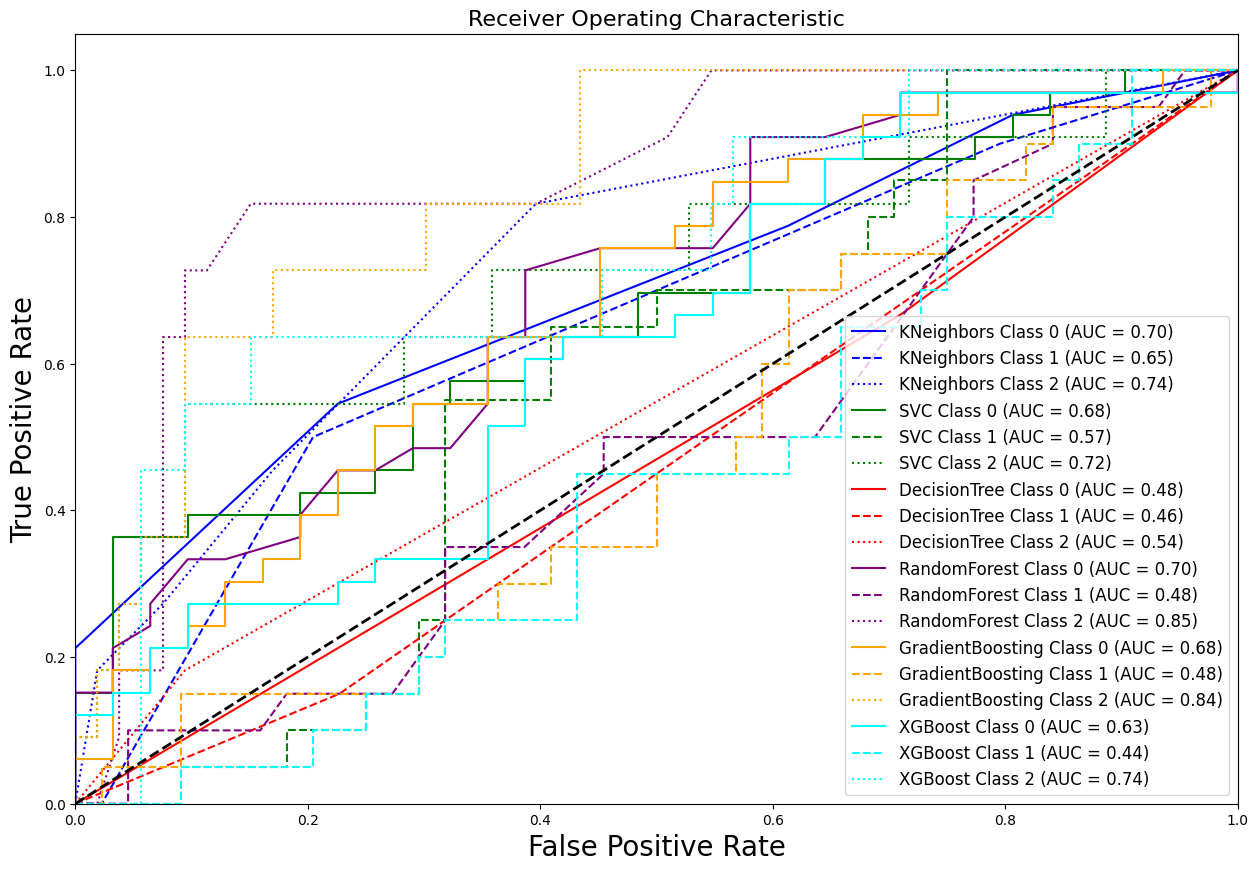

In [ ]:
import matplotlib.pyplot as plt

# Inspeccionar las claves de roc_curves para entender su formato
print("Claves de roc_curves:", list(roc_curves.keys()))

# Lista de colores para cada modelo
model_colors = {
    'KNeighbors': 'blue',
    'SVC': 'green',
    'DecisionTree': 'red',
    'RandomForest': 'purple',
    'GradientBoosting': 'orange',
    'XGBoost': 'cyan'
}

# Estilos de línea para cada clase
line_styles = {
    0: 'solid',
    1: 'dashed',
    2: 'dotted'
}

# Visualizar las curvas ROC
plt.figure(figsize=(15, 10))
for key, (fpr, tpr, roc_auc) in roc_curves.items():
    # Verificar el formato de la clave
    if 'Class' in key:
        model_name, class_label = key.rsplit(' Class ', 1)
        class_label = int(class_label)
        color = model_colors.get(model_name, 'black')
        linestyle = line_styles.get(class_label, 'solid')
        plt.plot(fpr, tpr, color=color, linestyle=linestyle, label=f'{key} (AUC = {roc_auc:.2f})')
    else:
        print(f"Formato inesperado en la clave: {key}")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.title('Receiver Operating Characteristic', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.show()

#Uso de SmoteTomek

In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek

# Preparación de los datos
X = df1.drop(columns=['UCI_TIME', 'Survival Rate', 'subject_id','weight','height','age','Anestesia_TIME','Operation_TIME'])
#X = df_filt1.drop(columns=['UCI_TIME', 'Survival Rate', 'subject_id'])
y = df1['UCI_TIME']

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


########################################
# Crear una instancia de SMOTE-Tomek
smote_tomek = SMOTETomek(sampling_strategy='auto', random_state=42)

# Aplicar SMOTE-Tomek a los datos
X_resampled, y_resampled = smote_tomek.fit_resample(X_scaled, y)


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

# Mostrar el DataFrame resultante
conteo=y_resampled.value_counts()
conteo

,count
UCI_TIME,
2,174
0,172
1,172


#Analisis de metricas

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, roc_auc_score, roc_curve, auc as sklearn_auc


# Inicializar modelos
models = {

    'KNeighbors': KNeighborsClassifier(),
    'SVC': SVC(probability=True),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Entrenar los modelos
for name, model in models.items():
    model.fit(X_train, y_train)

# Función para calcular NPV
def npv_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    TN = cm[0, 0]
    FN = cm[1, 0]
    return TN / (TN + FN) if (TN + FN) > 0 else np.nan

# Función para calcular Specificity
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    return TN / (TN + FP) if (TN + FP) > 0 else np.nan

# Inicializar la lista de resultados
results = []
confusion_matrices = {}
roc_curves = {}

# Calcular métricas para cada modelo y clase
for name, model in models.items():

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

    # Guardar la matriz de confusión para su visualización posterior
    confusion_matrices[name] = confusion_matrix(y_test, y_pred)

    classes = np.unique(y_train)
    for i in classes:
        y_true_binary = (y_test == i).astype(int)
        y_pred_binary = (y_pred == i).astype(int)

        accuracy = accuracy_score(y_true_binary, y_pred_binary) * 100
        sensitivity = recall_score(y_true_binary, y_pred_binary) * 100
        specificity = specificity_score(y_true_binary, y_pred_binary) * 100
        f1 = f1_score(y_true_binary, y_pred_binary) * 100
        auc = roc_auc_score(y_true_binary, y_prob[:, i]) * 100 if y_prob is not None else np.nan

        results.append([f'{name} Class {i}', accuracy, sensitivity, specificity, f1, auc])

        # Calcular la curva ROC
        if y_prob is not None:
            fpr, tpr, _ = roc_curve(y_true_binary, y_prob[:, i])
            roc_auc = sklearn_auc(fpr, tpr)
            roc_curves[f'{name} Class {i}'] = (fpr, tpr, roc_auc)

    # Calcular promedios
    metrics = np.array([result[1:] for result in results if result[0].startswith(name)])
    average_metrics = np.mean(metrics, axis=0)
    results.append([f'{name} Average', *average_metrics])

# Crear el DataFrame
df = pd.DataFrame(results, columns=['Model', 'Accuracy (%)', 'Sensitivity or recall (%)', 'Specificity (%)', 'F1-Score (%)', 'AUC (%)'])

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:07:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
df

,Model,Accuracy (%),Sensitivity or recall (%),Specificity (%),F1-Score (%),AUC (%)
0,KNeighbors Class 0,71.153846,27.272727,91.549296,37.500000,73.431498
1,KNeighbors Class 1,68.269231,72.222222,66.176471,61.176471,82.802288
2,KNeighbors Class 2,83.653846,82.857143,84.057971,77.333333,93.126294
3,KNeighbors Average,74.358974,60.784031,80.594579,58.669935,83.120027
4,SVC Class 0,76.923077,63.636364,83.098592,63.636364,86.128895
5,SVC Class 1,76.923077,75.000000,77.941176,69.230769,89.460784
6,SVC Class 2,84.615385,68.571429,92.753623,75.000000,93.706004
7,SVC Average,79.487179,69.069264,84.597797,69.289044,89.765228
8,DecisionTree Class 0,74.038462,51.515152,84.507042,55.737705,68.011097
9,DecisionTree Class 1,73.076923,69.444444,75.000000,64.102564,72.222222


In [ ]:
# Exportar a un archivo CSV
df.to_csv('df_resul.csv', index=False)

#Matriz de confusión

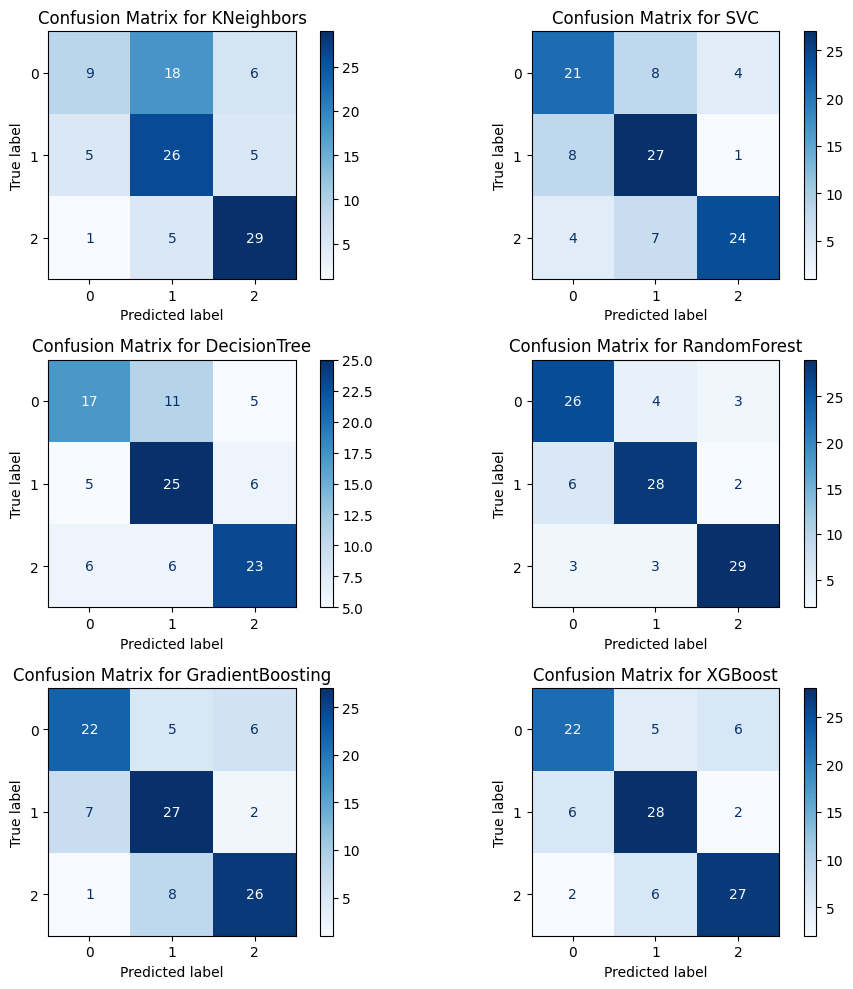

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Generar y mostrar las matrices de confusión en subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))

for idx, (name, cm) in enumerate(confusion_matrices.items()):
    row = idx // 2
    col = idx % 2
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_train))
    disp.plot(cmap='Blues', ax=axes[row, col])
    axes[row, col].set_title(f'Confusion Matrix for {name}')
    axes[row, col].grid(False)

plt.tight_layout()
plt.show()

#Curva ROC

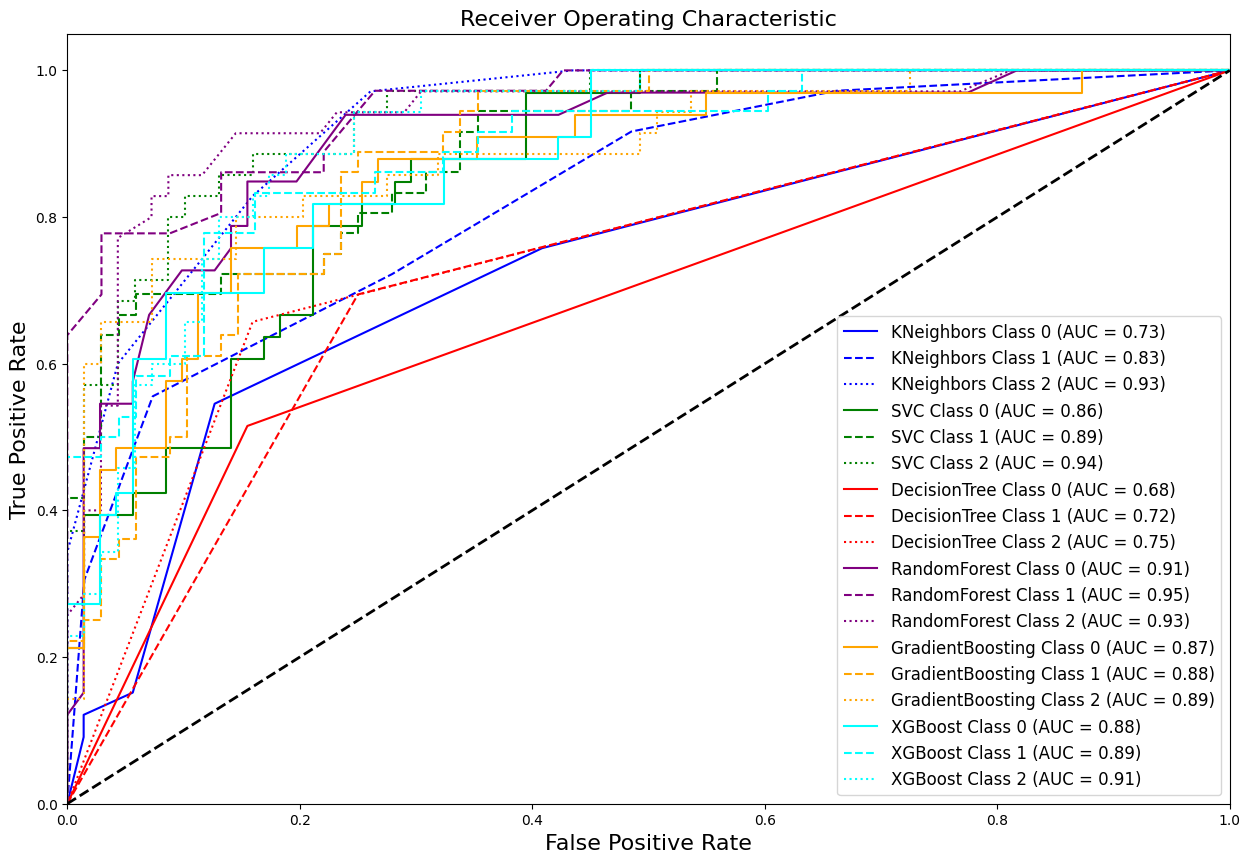

In [ ]:
import matplotlib.pyplot as plt

# Inspeccionar las claves de roc_curves para entender su formato

#print("Claves de roc_curves:", list(roc_curves.keys()))

# Lista de colores para cada modelo
model_colors = {
    'KNeighbors': 'blue',
    'SVC': 'green',
    'DecisionTree': 'red',
    'RandomForest': 'purple',
    'GradientBoosting': 'orange',
    'XGBoost': 'cyan'
}

# Estilos de línea para cada clase
line_styles = {
    0: 'solid',
    1: 'dashed',
    2: 'dotted'
}

# Visualizar las curvas ROC
plt.figure(figsize=(15, 10))
for key, (fpr, tpr, roc_auc) in roc_curves.items():
    # Verificar el formato de la clave
    if 'Class' in key:
        model_name, class_label = key.rsplit(' Class ', 1)
        class_label = int(class_label)
        color = model_colors.get(model_name, 'black')
        linestyle = line_styles.get(class_label, 'solid')
        plt.plot(fpr, tpr, color=color, linestyle=linestyle, label=f'{key} (AUC = {roc_auc:.2f})')
    else:
        print(f"Formato inesperado en la clave: {key}")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver Operating Characteristic', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.show()

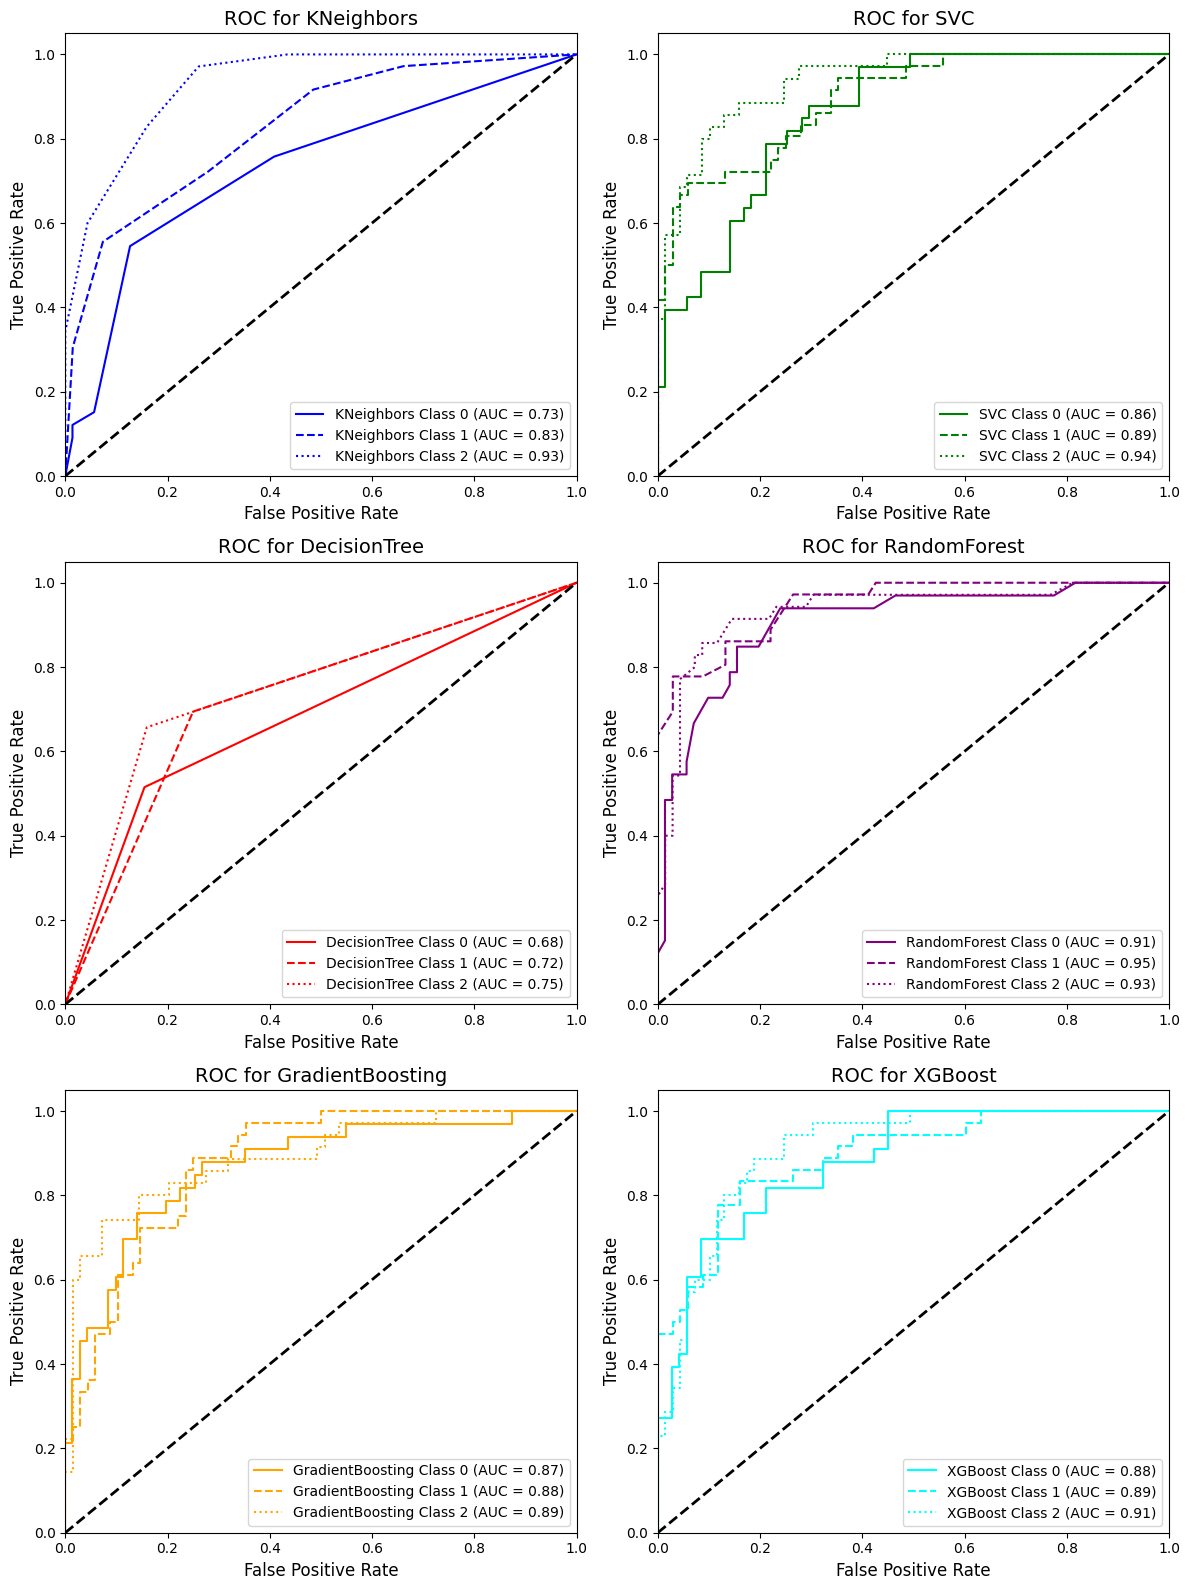

In [ ]:
import matplotlib.pyplot as plt

# Inspeccionar las claves de roc_curves para entender su formato
#print("Claves de roc_curves:", list(roc_curves.keys()))

# Lista de colores para cada modelo
model_colors = {
    'KNeighbors': 'blue',
    'SVC': 'green',
    'DecisionTree': 'red',
    'RandomForest': 'purple',
    'GradientBoosting': 'orange',
    'XGBoost': 'cyan'
}

# Estilos de línea para cada clase
line_styles = {
    0: 'solid',
    1: 'dashed',
    2: 'dotted'
}

# Configurar la figura y los ejes para 3 filas y 2 columnas
fig, axes = plt.subplots(3, 2, figsize=(12, 16))
axes = axes.flatten()  # Aplanar la matriz de ejes para un acceso más fácil

# Iterar sobre los modelos y graficar cada uno en un subgráfico
for idx, (model_name, color) in enumerate(model_colors.items()):
    ax = axes[idx]
    for key, (fpr, tpr, roc_auc) in roc_curves.items():
        if model_name in key:
            _, class_label = key.rsplit(' Class ', 1)
            class_label = int(class_label)
            linestyle = line_styles.get(class_label, 'solid')
            ax.plot(fpr, tpr, color=color, linestyle=linestyle, label=f'{key} (AUC = {roc_auc:.2f})')

    ax.plot([0, 1], [0, 1], 'k--', lw=2)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate', fontsize=12)
    ax.set_ylabel('True Positive Rate', fontsize=12)
    ax.set_title(f'ROC for {model_name}', fontsize=14)
    ax.legend(loc='lower right', fontsize=10)

# Ajustar el espacio entre subgráficas
plt.tight_layout()
plt.show()


#Analisis usando SHAP

In [ ]:
!pip install shap
import shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 10.0 MB/s eta 0:00:00


In [ ]:
df_shap=df1.drop(columns=['Survival Rate','UCI_TIME','subject_id']).copy()
df_concat_shap = pd.concat([df_shap,df1],axis=1)
df_concat_shap

,weight,height,age,Anestesia_TIME,Operation_TIME,rr_mean,spo2_mean,o2_mean,air_mean,minvol_mean,...,hr_max,art_dbp_max,art_mbp_max,etco2_max,fio2_max,hs_max,uo_max,ebl_max,peep_max,sex_encoded
0,59.0,163.0,65,380.0,340.0,9.519231,99.215190,3.233333,0.260000,4.046154,...,108.0,68.0,88.0,35.0,95.0,700.0,500.0,500.0,5.0,0
1,63.0,174.0,40,175.0,140.0,15.027778,95.000000,3.300000,0.333333,8.423529,...,108.0,0.0,0.0,41.0,91.0,400.0,50.0,40.0,0.0,1
2,46.0,146.0,85,180.0,100.0,10.569444,99.729730,4.300000,1.500000,3.822222,...,108.0,82.0,114.0,37.0,0.0,400.0,120.0,40.0,1.0,0
5,51.0,167.0,60,400.0,325.0,12.580247,99.439024,3.350000,1.300000,6.251852,...,108.0,88.0,114.0,39.0,0.0,700.0,150.0,400.0,0.0,1
20,43.0,156.0,70,335.0,300.0,11.126866,98.328358,1.725000,0.250000,3.856716,...,100.0,58.0,86.0,35.0,95.0,0.0,0.0,500.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,43.0,157.0,50,415.0,380.0,9.717949,99.383721,3.250000,0.750000,3.835897,...,100.0,82.0,114.0,37.0,95.0,400.0,400.0,150.0,8.0,0
1149,57.0,167.0,85,230.0,175.0,12.021739,99.844444,3.350000,1.300000,4.443478,...,108.0,88.0,114.0,37.0,97.2,0.0,40.0,100.0,5.0,1
1150,56.0,158.0,50,100.0,75.0,11.568182,99.954545,3.350000,1.300000,4.036364,...,108.0,82.0,114.0,35.0,95.0,0.0,120.0,40.0,1.0,0
1151,51.0,159.0,65,105.0,75.0,15.975000,99.900000,0.000000,1.500000,6.160000,...,108.0,82.0,114.0,41.0,95.0,0.0,50.0,500.0,5.0,1


               SHAP_value
hr               8.312578
ebl              6.989791
pip              6.135551
fio2             5.137503
art_mbp          5.025799
art_dbp          4.681549
hs               4.382037
etco2             3.38718
vt               3.377287
peep             3.247813
minvol           3.043278
uo               3.019657
spo2             2.812797
rr               2.472862
air              2.241385
o2               2.090644
Operation_TIME   1.349135
Anestesia_TIME   1.126432
age              0.927005
sex_encoded      0.872127
weight            0.84809
height           0.743937


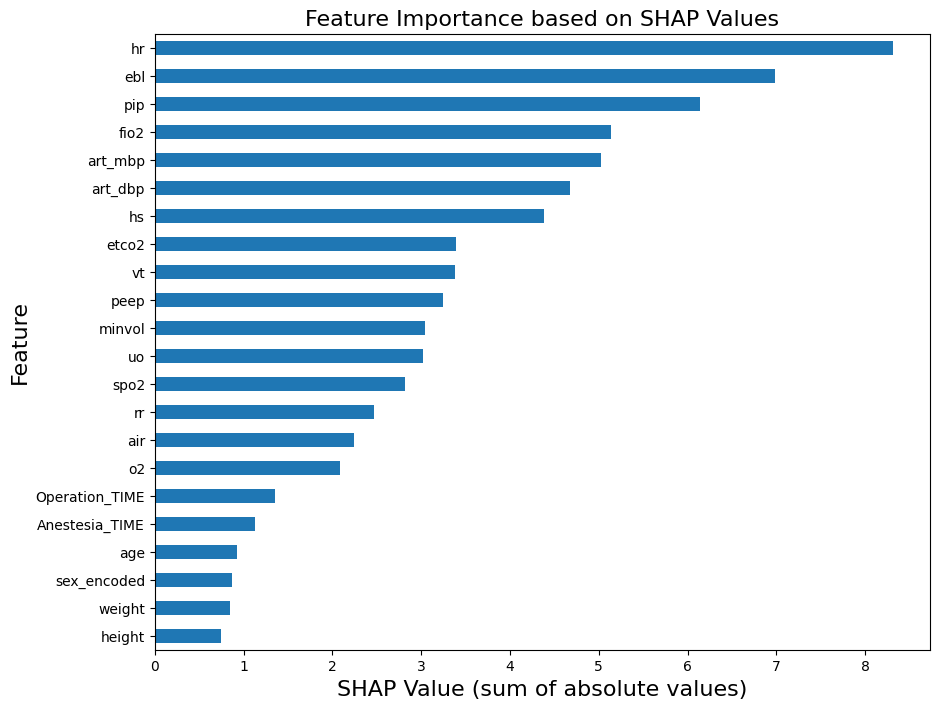

In [ ]:
# X contiene todas las características, y contiene la variable objetivo UCI_TIME
X = df_concat_shap.drop(columns=['UCI_TIME'])
y = df_concat_shap['UCI_TIME']

# Convertir y a un array 1D si es necesario
y = y.values.ravel()

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Crear un objeto SHAP explainer usando el modelo entrenado
explainer = shap.TreeExplainer(model)

# Calcular los valores SHAP para el conjunto de prueba
shap_values = explainer.shap_values(X_test)

# Si hay múltiples clases, promediamos los valores SHAP para obtener una sola métrica por característica
if isinstance(shap_values, list):
    shap_values = np.mean(np.abs(shap_values), axis=0)

# Listas de características con sus sufijos
valores_unicos2 = ['rr', 'spo2', 'o2', 'air', 'minvol', 'vt', 'pip', 'hr', 'art_dbp', 'art_mbp', 'etco2', 'fio2', 'hs', 'uo', 'ebl', 'peep']
valores_mean = [f"{valor}_mean" for valor in valores_unicos2]
valores_min = [f"{valor}_min" for valor in valores_unicos2]
valores_max = [f"{valor}_max" for valor in valores_unicos2]

# Características adicionales
additional_features = ['weight', 'height','sex_encoded', 'age', 'Anestesia_TIME', 'Operation_TIME']

# Crear un DataFrame para almacenar la suma de los valores SHAP para cada característica
shap_importance = pd.DataFrame(index=valores_unicos2 + additional_features, columns=['SHAP_value'])

# Sumar los valores SHAP correspondientes a la misma característica a través de las diferentes estadísticas
for feature in valores_unicos2:
    shap_importance.loc[feature, 'SHAP_value'] = (
        np.abs(shap_values[:, X_test.columns.get_loc(f"{feature}_mean")]).sum() +
        np.abs(shap_values[:, X_test.columns.get_loc(f"{feature}_min")]).sum() +
        np.abs(shap_values[:, X_test.columns.get_loc(f"{feature}_max")]).sum()
    )

# Agregar los valores SHAP de las características adicionales
for feature in additional_features:
    shap_importance.loc[feature, 'SHAP_value'] = np.abs(shap_values[:, X_test.columns.get_loc(feature)]).sum()

# Ordenar las características por importancia
shap_importance = shap_importance.sort_values(by='SHAP_value', ascending=False)

# Mostrar la importancia de las características
print(shap_importance)


shap_importance.plot(kind='barh', figsize=(10, 8), legend=False)
plt.xlabel('SHAP Value (sum of absolute values)', fontsize=16)
plt.ylabel('Feature', fontsize=16)
plt.title('Feature Importance based on SHAP Values', fontsize=16)
plt.gca().invert_yaxis()  # Para que las características más importantes estén arriba
plt.show()